In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils
 

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

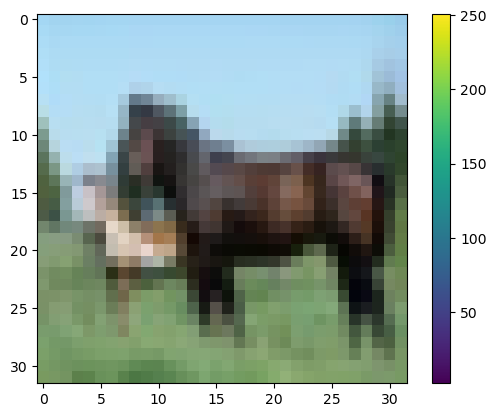

In [15]:
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.grid(False)

In [16]:
x_train = x_train/ 255
x_test = x_test/ 255

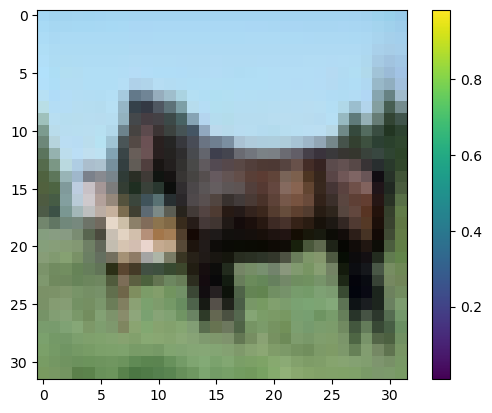

In [17]:
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.grid(False)

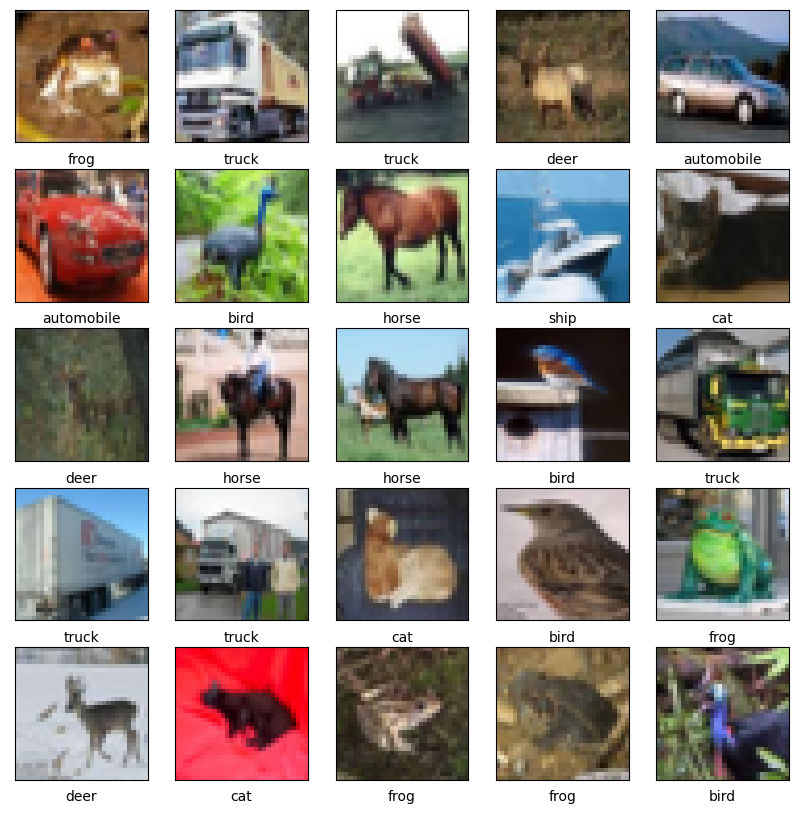

In [28]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])


In [19]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002), loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [23]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5555 - accuracy: 0.4378
Epoch 2/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1189 - accuracy: 0.6048
Epoch 3/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9219 - accuracy: 0.6796
Epoch 4/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7899 - accuracy: 0.7263
Epoch 5/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6942 - accuracy: 0.7585
Epoch 6/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6120 - accuracy: 0.7875
Epoch 7/20
1563/1563 [==============================] - 52s 34ms/step - loss: 0.5449 - accuracy: 0.8099
Epoch 8/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4784 - accuracy: 0.8345
Epoch 9/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4133 - accuracy: 0.8567
Epoch 10/20
1563/1563 [==============================] - 52s 33m

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 1.6293 - accuracy: 0.7490
Test loss: 1.6292715072631836
Test accuracy: 0.7490000128746033


In [25]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


array([5], dtype=uint8)

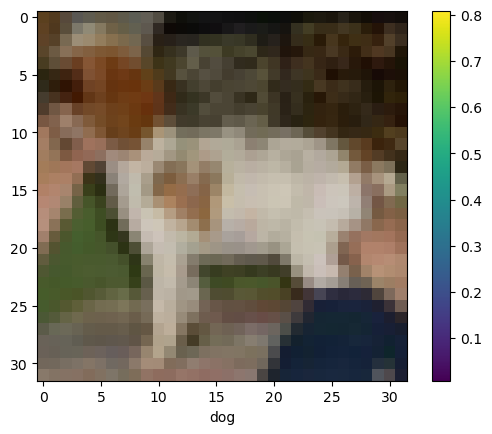

In [27]:
im = 12
predictions[im]
np.argmax(predictions[im])
y_test[im]
plt.figure()
plt.imshow(x_test[im])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_test[im][0]])
y_test[im]